In [1]:
%matplotlib inline

In [2]:
import numpy as np
import nibabel as nb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
sns.set_context('talk')

Dimensions
* x is A-P, 528 voxels, 21120 mm
* y is P-I, 320 voxels, 12800 mm
* z is L-R, 456 voxels, 18240 mm

Origin (center, hopefully origin)
* x: 10560 mm
* y: 6400 mm
* z: 9120 mm

In [4]:
img = nb.load("/home/julia/projects/gradients/atlas/register_AMBA/ABI_template_25um.nii")

In [5]:
data_orig=img.get_data()

In [6]:
data_orig.shape

(456, 528, 320)

The dimensions are wrong, so we swap the axes to have the ones described above

In [7]:
data_swap = np.swapaxes(np.swapaxes(data_orig, 0,1), 1,2)

In [8]:
data_swap.shape

(528, 320, 456)

Now the axes are correct, but as we see below the directions are still off (for left right we cannot figure out the direction, so we just keep as is)

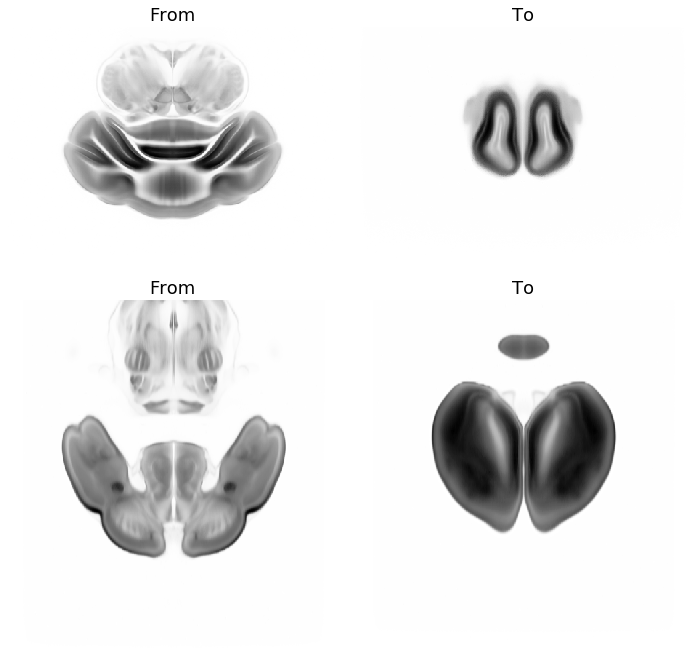

In [9]:
fig = plt.figure(figsize=(10,10));
ax1=fig.add_subplot(2,2,1);
plt.imshow(data_swap[30, :, :], cmap='Greys');
plt.title('From')
plt.axis('off');
fig.add_subplot(2,2,2);
ax2=plt.imshow(data_swap[500, :, :], cmap='Greys');
plt.title('To')
plt.axis('off');
plt.tight_layout()
ax3=fig.add_subplot(2,2,3);
plt.imshow(data_swap[:, 50, :], cmap='Greys');
plt.title('From')
plt.axis('off');
fig.add_subplot(2,2,4);
ax4=plt.imshow(data_swap[:, 280, :], cmap='Greys');
plt.title('To')
plt.axis('off');
plt.tight_layout()

In [10]:
data_flip = np.flip(np.flip(data_swap,0),1)

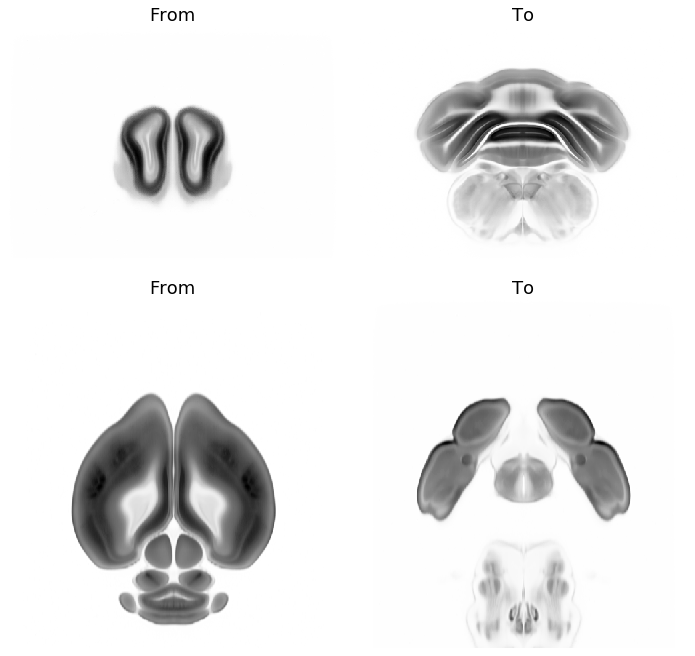

In [11]:
fig = plt.figure(figsize=(10,10));
ax1=fig.add_subplot(2,2,1);
plt.imshow(data_flip[30, :, :], cmap='Greys');
plt.title('From')
plt.axis('off');
fig.add_subplot(2,2,2);
ax2=plt.imshow(data_flip[500, :, :], cmap='Greys');
plt.title('To')
plt.axis('off');
plt.tight_layout()
ax3=fig.add_subplot(2,2,3);
plt.imshow(data_flip[:, 50, :], cmap='Greys');
plt.title('From')
plt.axis('off');
fig.add_subplot(2,2,4);
ax4=plt.imshow(data_flip[:, 280, :], cmap='Greys');
plt.title('To')
plt.axis('off');
plt.tight_layout()

Now the data is correct. Next is to build a function that translates mm location from the center into voxels

In [12]:
orig = (0,0,0)#(10560, 6400, 9120)
loc = (2804.18,1445.61,-1.31836) # region 795 periaqueductal gray

adj_loc = [orig[x] + loc[x] for x in range(3)]
vox = [int(np.round(x * 0.025)) for x in adj_loc]

In [13]:
test_vox = data_flip.copy()

In [14]:
test_vox[vox[0], vox[1], vox[2]] = 2000

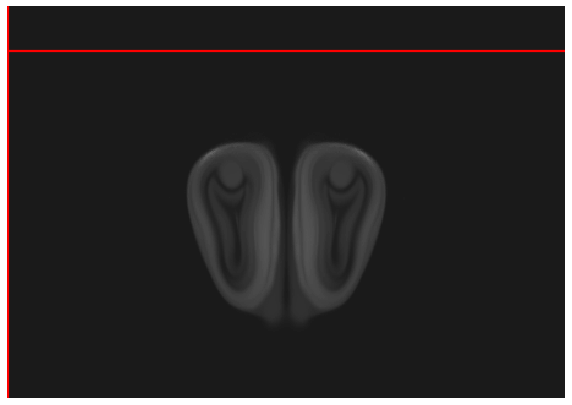

In [16]:
fig = plt.figure(figsize=(10,10));
plt.imshow(test_vox[vox[0], :, :], cmap='RdGy_r');
plt.axis('off');
plt.axvline(x=vox[2],color='red')
plt.axhline(y=vox[1],color='red')

In [17]:
positions = pd.read_csv('/home/julia/projects/gradients/atlas/register_AMBA/positions.txt', 
                        nrows=100, 
                        usecols=[0,1,2,3,4], 
                        header=None, 
                        skiprows=1,
                        names=['x', 'y', 'z', 'region', 'type'])

In [18]:
positions

,x,y,z,region,type
0,6491.54,194.9760,1213.0900,10681,exc
1,6079.99,1243.2400,286.9950,10723,exc
2,4420.22,1817.7800,2122.5200,10672,exc
3,4796.98,2579.7700,-1222.6400,10722,exc
4,4850.29,1302.7600,1142.4500,10722,exc
5,3574.23,-2001.1600,-3781.7900,10689,exc
6,4916.19,-411.1310,-181.2760,10737,exc
7,4919.28,620.9660,-3097.0700,10675,exc
8,6322.38,-320.3700,-413.7470,10732,exc
9,6089.54,1378.0700,-2198.7000,10680,exc


In [236]:
positions.loc[positions['region'] == 10675]

,x,y,z,region,type
7,4919.28,620.966,-3097.07,10675,exc
17,4936.60,363.365,-3115.38,10675,exc
21,5891.32,1267.080,1621.47,10675,exc
24,5030.42,1231.450,-2998.25,10675,exc


In [192]:
annot = nb.load("/home/julia/projects/gradients/atlas/ABI_atlas_reduced_25um.nii.gz")
annot_csv = pd.read_csv("/home/julia/projects/gradients/atlas/ABI_atlas_reduced.csv")
annot = annot.get_data()
annot = np.swapaxes(np.swapaxes(annot, 0,1), 1,2)
annot = np.flip(np.flip(annot,0),1)

In [210]:
annot[vox[0], vox[1]+1, vox[2]]

69

In [212]:
annot_csv.loc[annot_csv['ID'] == 69]

,ID,acronym,names,hemisphere,ontology
68,69,MB,Midbrain,right,MB


In [214]:
mask = np.zeros(annot.shape)
mask[np.where(annot==69)]=1

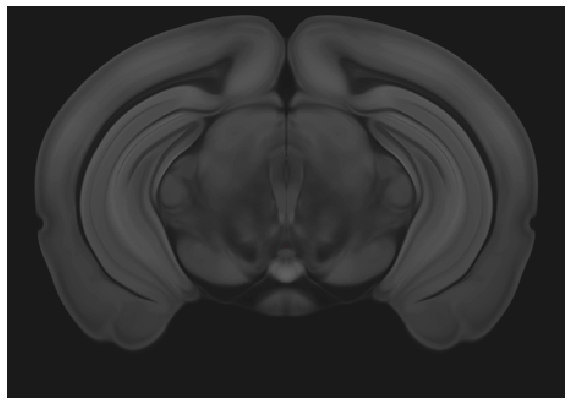

In [237]:
fig = plt.figure(figsize=(10,10));
plt.imshow(test_vox[vox[0], :, :], cmap='RdGy_r');
#plt.imshow(mask[vox[0], :,:], cmap='Reds', alpha=0.5)
plt.axis('off');
#plt.axvline(x=vox[2],color='red')
#plt.axhline(y=vox[1],color='red')

In [ ]:
positions.loc[positions['region'] == 795]